Functional API Basics



In [2]:
import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(3,))
x = keras.layers.Dense(4, activation="relu")(inputs)
x = keras.layers.Dense(2, activation="relu")(x)
outputs = keras.layers.Dense(1, name="output")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="simple_model")

model.compile(optimizer="rmsprop", loss="mean_squared_error")
model.summary()

Model: "simple_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
!pip install graphviz

Unable to create process using 'C:\Users\Neo Dev 1\Anaconda\python.exe "C:\Users\Neo Dev 1\Anaconda\Scripts\pip-script.py" install graphviz'


In [12]:
keras.utils.plot_model(model, "my_first_model.png", show_layer_names=True, show_shapes=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [16]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [20]:
# Using the Functional API to define our model
inputs = keras.Input(shape=(28,28))
x = keras.layers.Flatten(name="flatten")(inputs)
x = keras.layers.Dense(128, activation="relu", name="hidden1")(x)
x = keras.layers.Dense(64, activation="relu", name="hidden2")(x)
outputs = keras.layers.Dense(10, activation="softmax", name="output")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_classifier")

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "mnist_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# get a specific layer
model.layers[1].weights

[]

In [24]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7276 - loss: 10.5086 - val_accuracy: 0.8618 - val_loss: 0.7470
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8942 - loss: 0.5303 - val_accuracy: 0.9056 - val_loss: 0.4318
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.2977 - val_accuracy: 0.9228 - val_loss: 0.3726
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9430 - loss: 0.2140 - val_accuracy: 0.9381 - val_loss: 0.3198
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 0.1622 - val_accuracy: 0.9445 - val_loss: 0.2970


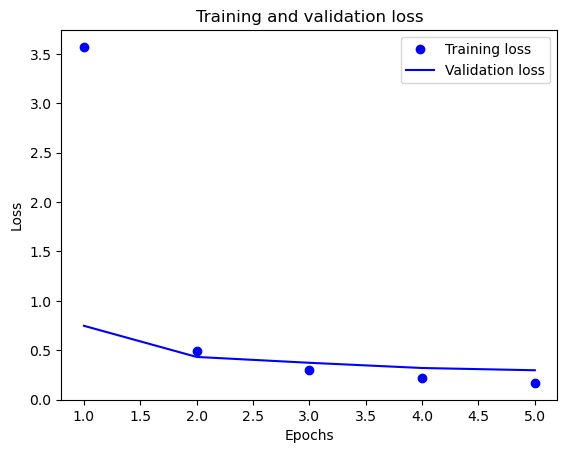

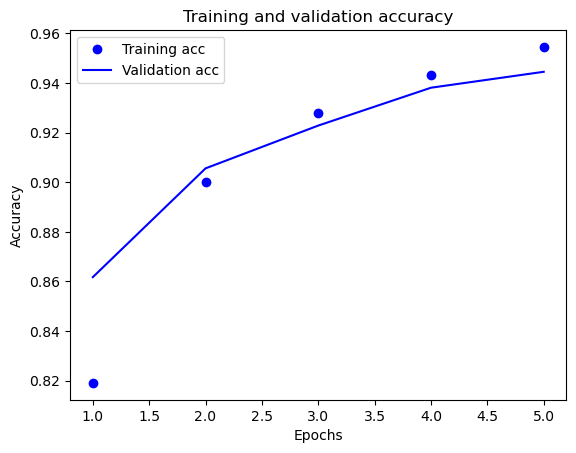

In [26]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9294 - loss: 0.3748
Test loss: 0.3056
Test accuracy: 0.9410
